In [1]:
import xml.etree.ElementTree as ET
index = ET.parse("data//reg//index.xml")
reg = ET.parse("data//reg//RegContent.xml")
root = index.getroot()
root2 = reg.getroot()

In [2]:
regs = root.findall("RegContent")
a = regs[0]
regs2 = root2.findall("RegContent")
b = regs2[0]

In [3]:
print(a.tag)
print(a.attrib)
print(b.tag)
print(b.attrib)

RegContent
{'no': '1'}
RegContent
{}


In [4]:
for x in a:
    print("=",x.tag,"=")
    #print(x.attrib)
    #print(x.text)
    for y in x:
        print("\t==",y.tag,"==")
        #print("\t",y.attrib)
        #print("\t",y.text)
print("==========")
for x in b:
    print("=",x.tag,"=")
    #print(x.attrib)
    #print(x.text)
    for y in x:
        print("\t==",y.tag,"==")
        #print("\t",y.attrib)
        #print("\t",y.text)

= CaseNo =
= RegisterNo =
= Trademark_Name =
= Trademark_Design =
= Filing_Date =
= SDate =
= EDate =
= Mark_Type =
= ServiceMark =
= RegContentAgent =
	== BChinese ==
= RegContentClassification =
	== Class ==
= RegContentOwner =
	== AChinese ==
	== AEnglish ==
= CaseNo =
= RegisterNo =
= Trademark_Name =
= Trademark_Design =
= Filing_Date =
= Censor =
= Priority_Date =
= SDate =
= EDate =
= Word_Description =
= Mark_Type =
= Memo =
= Wavpath =
= ServiceMark =
= RegContentAgent =
	== BChinese ==
= RegContentClassification =
	== Enforcement_Rules ==
	== Class ==
	== Goods_Denomination ==
= RegContentOwner =
	== AChinese ==
	== AEnglish ==
	== Address ==
= RegContentPicture =
	== FileName ==
	== DisplayName ==
	== Path ==


In [5]:
L = [0,0,0,0]
for b in regs2:
    #L.append(b.findall("Mark_type").text)
    #print(b.findall("Mark_Type")[0].text)
    L[int(b.findall("Mark_Type")[0].text)] = L[int(b.findall("Mark_Type")[0].text)] + 1
print(L)

[3691, 0, 0, 5]


In [42]:
L2 = []
for i in range(46):
    L2.append(0)
for b in regs2:
    #L.append(b.findall("Mark_type").text)
    #print(b.findall("Mark_Type")[0].text)
    for c in b:
        if c.tag == "RegContentClassification":
            #print(c.findall("Class")[0].text[1:3])
            if c.findall("Class")[0].text[1:3] != "":
                L2[int(c.findall("Class")[0].text[1:3])] = L2[int(c.findall("Class")[0].text[1:3])] + 1
print(L2[1:])
print(L2[29])

[66, 18, 270, 23, 319, 40, 88, 28, 321, 77, 71, 53, 3, 39, 4, 129, 22, 70, 18, 79, 111, 9, 6, 44, 172, 13, 9, 92, 217, 346, 70, 85, 40, 10, 595, 95, 82, 74, 52, 32, 243, 143, 296, 91, 41]
217


In [41]:
ind = L2[1:]
ind.index(217)+1

29

In [7]:
sum(L2)-3696

1010

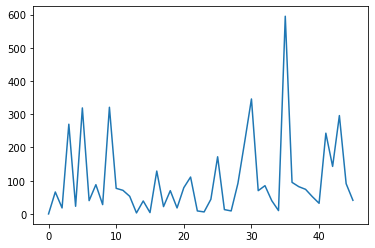

In [8]:
import matplotlib.pyplot as plt
plt.plot(L2)
plt.show()

In [9]:
L3 = []
for i in range(111):
    L3.append(0)
for b in regs2:
    #print(b.findall("CaseNo")[0].text[0:3])
    L3[int(b.findall("CaseNo")[0].text[0:3])] = L3[int(b.findall("CaseNo")[0].text[0:3])] + 1
print(L3[100:])

[0, 0, 0, 0, 0, 0, 4, 11, 178, 3503, 0]


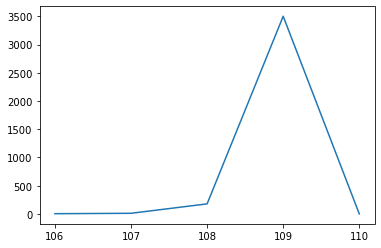

In [27]:
plt.plot([106,107,108,109,110],L3[106:])
plt.xticks(range(106,111))
plt.show()

In [11]:
L4 = {}

for b in regs2:
    #print(b.findall("Trademark_Design")[0].text)
    try:
        L4[b.findall("Trademark_Design")[0].text] = L4[b.findall("Trademark_Design")[0].text] + 1
    except:
        L4[b.findall("Trademark_Design")[0].text] = 0
print(L4)
#立體

{'(墨色)(平面)': 2998, '(彩色)(平面)': 696}


In [48]:
L5 = {}

for b in regs2:
    #print(b.findall("Address")[0].text)
    for c in b:
        if c.tag == "RegContentOwner":
            try:
                L5[c.findall("Address")[0].text] = L5[c.findall("Address")[0].text] + 1
            except:
                L5[c.findall("Address")[0].text] = 1

L5.pop(None)
print(sorted(L5.items(), key=lambda L5: L5[1],reverse=True))

[('臺北市', 736), ('臺中市', 504), ('新北市', 459), ('高雄市', 267), ('臺南市', 262), ('中國大陸', 210), ('桃園市', 154), ('日本', 153), ('彰化縣', 144), ('美國', 123), ('香港', 107), ('新竹縣', 72), ('南韓', 59), ('雲林縣', 47), ('屏東縣', 38), ('南投縣', 35), ('苗栗縣', 33), ('法國', 31), ('新竹市', 30), ('德國', 27), ('嘉義縣', 27), ('瑞士', 23), ('宜蘭縣', 21), ('英國', 18), ('義大利', 16), ('花蓮縣', 15), ('新加坡', 15), ('基隆市', 13), ('澳大利亞', 12), ('嘉義市', 10), ('金門縣', 10), ('丹麥', 8), ('薩摩亞', 8), ('臺東縣', 6), ('英屬維爾京群島', 6), ('巴哈馬', 6), ('開曼群島', 5), ('瑞典', 5), ('挪威', 4), ('俄羅斯聯邦', 3), ('荷蘭', 3), ('泰國', 3), ('印度尼西亞', 3), ('芬蘭', 2), ('西班牙', 2), ('加拿大', 2), ('奧地利', 2), ('紐西蘭', 2), ('澎湖縣', 1), ('波蘭', 1), ('比利時', 1), ('南非', 1), ('愛爾蘭', 1), ('中華民國', 1), ('葡萄牙', 1), ('曼島', 1), ('馬來西亞', 1), ('匈牙利', 1)]


<BarContainer object of 58 artists>

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22283 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26691 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26032 missing from current

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 24503 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22283 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26691 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22290 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26032 missing from current font.
  f

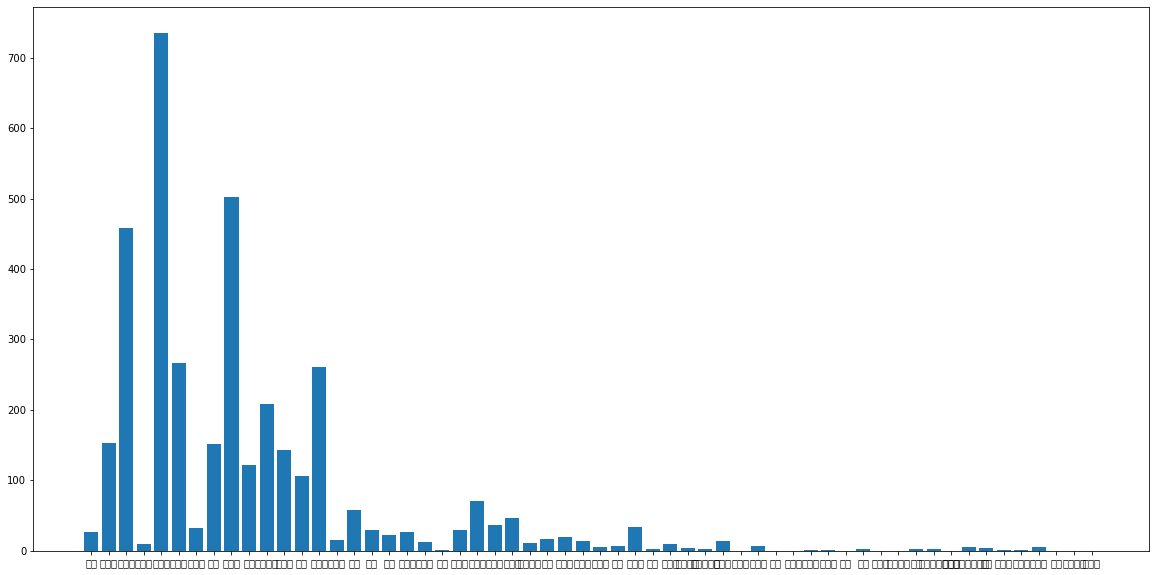

In [13]:
plt.figure(figsize=(20,10))
plt.bar(list(L5.keys()),list(L5.values()))

In [14]:
from matplotlib.font_manager import findfont,FontProperties
findfont(FontProperties(family=FontProperties().get_family()))
plt.rcParams['font.sans-serif']

['DejaVu Sans',
 'Bitstream Vera Sans',
 'Computer Modern Sans Serif',
 'Lucida Grande',
 'Verdana',
 'Geneva',
 'Lucid',
 'Arial',
 'Helvetica',
 'Avant Garde',
 'sans-serif']

In [ ]:
<-核駁號
	->T0349609
<-商標種類
	->商標
<-申請案號
	->089704174
<-申請日
	->089/12/27
<-核駁公告日期(卷期)
	->102/09/16(40-018)
<-行政救濟紀錄
	->
<-決定/判決日期
	->
<-決定/判決結果
	->
<-優先權日及首次申請國(地區)
	->
<-展覽會優先權日及展覽會名稱
	->
<-核駁條款
	->300110
<-據以核駁號
	->
商標01239860

<-中文名稱
	->黃○○秀
<-中文地址
	->************************
<-英文名稱
	->
<-國籍
	->中華民國
<-中文名稱
	->黃素珍
<-中文地址
	->彰化縣鹿港鎮頂番里彰頂路54號
<-商標名稱
	->億珍齋
<-商標樣態／圖樣顏色
	->


<-被核駁圖形
	->
<-被核駁圖樣中文
	->億珍齋
<-被核駁圖樣英文
	->
<-被核駁圖樣日文
	->
<-被核駁圖樣記號
	->
<-商標圖樣描述
	->
<-說明文字內容
	->
<-類別 
				030
			
<-商品/服務名稱
	->茶葉、茶葉製成之飲料，咖啡、可可、巧克力粉，咖啡、可可、巧克力製成之飲料，雪糕，冰淇淋，麥芽糖，蜂蜜，糖果，米果，餅乾，穀製點心片，蛋糕，麵包，布丁（粉），饅頭，糬，圓宵，湯圓，年糕，米糕，發粿，米粿，麵茶粉，杏仁霜，八寶粥。
<-類似組群
	->290101、290102、290104、2905、290802、2910、2916、3001、300101、300102、3002、300201、300202、3003、3005、300501、300502、3006、300601、300602、3008、3009、3012、301202、3015、301501、301601、3202、351902、351947、430201